Question 1

In [2]:

import pandas as pd

orange_data = pd.read_csv('orange_inc.csv', na_values="-")
missing_values = orange_data.isnull().sum()
print(missing_values)

user_id          0
age_bracket     53
tier            28
gender         152
oPhone          50
oWatch          40
oPods           45
oTV             30
date            17
card            20
dtype: int64


Question 2

In [3]:
orange_data_clean = orange_data.dropna()  # Remove rows with any missing values to create a clean dataset
orange_data_clean_count = len(orange_data_clean)
print(orange_data_clean_count)

19567


Question 3

In [5]:
orange_data_clean.loc[:, 'owns_multiple_products'] = (
    orange_data_clean[['oPhone', 'oWatch', 'oPods', 'oTV']].sum(axis=1) >= 2
).astype(int)

multiple_products_count = orange_data_clean['owns_multiple_products'].sum()
print(multiple_products_count)

8033


Question 4

In [7]:
female_customers = orange_data_clean[(orange_data_clean['age_bracket'] == '18-25') &
    (orange_data_clean['gender'] == 'female') &
    (orange_data_clean['card'].isin(['Visa_credit', 'Mastercard_credit']))]
female_customers_count = len(female_customers)
print(female_customers_count)

1825


Question 5

In [8]:
debit_customers_25_plus = orange_data_clean[((orange_data_clean['age_bracket'] != '18-25') &
 (orange_data_clean['card'].isin(['Visa_debit', 'Mastercard_debit', 'Other_debit'])) &
 (orange_data_clean['owns_multiple_products'] == 1))]
total_customers = len(orange_data_clean)
percentage= (len(debit_customers_25_plus) / total_customers) * 100
print(percentage)

13.609648898655898


Question 6

In [9]:
customers_with_all_products = orange_data_clean[(orange_data_clean['oPhone'] == 1) &
    (orange_data_clean['oWatch'] == 1) &
    (orange_data_clean['oPods'] == 1) &
    (orange_data_clean['oTV'] == 1)]
customers_with_all_products_count = len(customers_with_all_products)
print(customers_with_all_products_count)

89


Question 7

In [10]:
avg_products_by_tier = orange_data_clean[['oPhone', 'oWatch', 'oPods', 'oTV']].sum(axis=1).groupby(orange_data_clean['tier']).mean()
print(avg_products_by_tier)

tier
gold        1.484461
platinum    1.496120
silver      1.503344
dtype: float64


Question 8a

In [12]:
product_prices = {'oPhone': 1200, 'oWatch': 300, 'oPods': 150, 'oTV': 2500}
orange_data_clean.loc[:,'sales_revenue'] = 0
for product, price in product_prices.items():
    orange_data_clean.loc[:,'sales_revenue'] += orange_data_clean[product] * price  # Calculate the total sales revenue for each product.

total_revenue = orange_data_clean['sales_revenue'].sum()
print(total_revenue)

24008100


Question 8b

In [15]:
orange_data_clean.loc[:,'month_of_purchase'] = pd.to_datetime(orange_data_clean['date']).dt.month  # Extract the month from the 'date' column and store it in a new column 'month_of_purchase'.

monthly_sales = orange_data_clean.groupby('month_of_purchase')['sales_revenue'].sum()  # Group the data by month and calculate the total sales revenue for each month.
highest_sales_month = monthly_sales.idxmax()
highest_sales_value = monthly_sales.max()
print(highest_sales_month)
print(highest_sales_value)

5
2136900


Question 8c

In [16]:
total_sales_revenue = {}
for product, price in product_prices.items():
    total_sales_revenue[product] = (orange_data_clean[product] * price).sum()  # Calculate the total sales revenue for each product.
sales_revenue_df = pd.DataFrame(list(total_sales_revenue.items()), columns=['Product', 'Total Sales Revenue'])
print(sales_revenue_df)

  Product  Total Sales Revenue
0  oPhone           14938800.0
1  oWatch            1645500.0
2   oPods            1341300.0
3     oTV            6082500.0


Question 9a

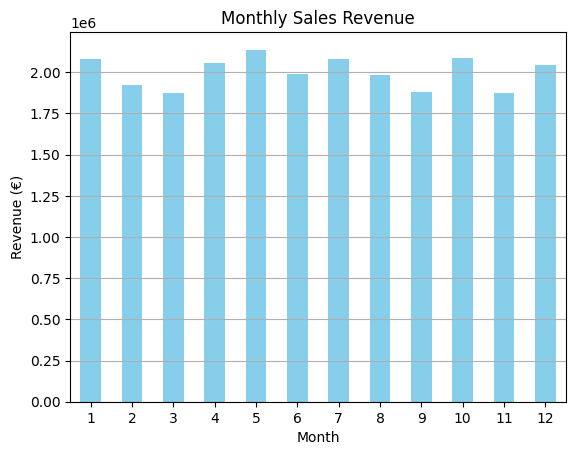

In [17]:
import matplotlib.pyplot as plt
monthly_sales = orange_data_clean.groupby('month_of_purchase')['sales_revenue'].sum()  # Calculate the total sales revenue for each month.
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (€)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Question 9b

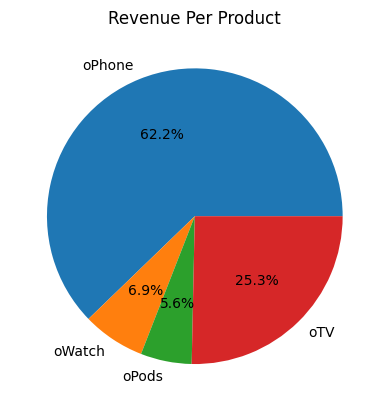

In [18]:
plt.pie(total_sales_revenue.values(), labels=total_sales_revenue.keys(), autopct='%1.1f%%')  # Create a pie chart to visualize the total sales revenue for each product.
plt.title('Revenue Per Product')
plt.show()

Question 10a

In [19]:
young_oPhone_owners = orange_data_clean[ (orange_data_clean['oPhone'] == 1) &
    (orange_data_clean['age_bracket'] == '18-25')]
most_preferred_card = young_oPhone_owners['card'].mode()[0]
print(most_preferred_card)

Visa_debit


Question 10b

In [20]:
average_products_purchased = young_oPhone_owners[['oPhone', 'oWatch', 'oPods', 'oTV']].sum(axis=1).mean()
print(average_products_purchased)

1.692532942898975
